In [1]:
# importing the usual suspects

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in the data

sal=pd.read_csv('v3_Latest_Data_Science_Salaries.csv')

In [3]:
# first 5 rows

sal.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Scientist,Full-Time,Senior,Expert,265000,United States Dollar,United States,265000,United States,Medium,2023
1,Data Scientist,Full-Time,Senior,Expert,172000,United States Dollar,United States,172000,United States,Medium,2023
2,Machine Learning Engineer,Full-Time,Mid,Intermediate,155810,United States Dollar,United States,155810,United States,Medium,2023
3,Machine Learning Engineer,Full-Time,Mid,Intermediate,106720,United States Dollar,United States,106720,United States,Medium,2023
4,Data Scientist,Full-Time,Entry,Junior,160800,United States Dollar,United Kingdom,160800,United Kingdom,Medium,2023


In [4]:
# a summary of our dataframe

sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3552 non-null   object
 1   Employment Type     3552 non-null   object
 2   Experience Level    3552 non-null   object
 3   Expertise Level     3552 non-null   object
 4   Salary              3552 non-null   int64 
 5   Salary Currency     3552 non-null   object
 6   Company Location    3552 non-null   object
 7   Salary in USD       3552 non-null   int64 
 8   Employee Residence  3552 non-null   object
 9   Company Size        3552 non-null   object
 10  Year                3552 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 305.4+ KB


We have 3552 observations and 11 features.

There are no null values.

The columns are in the appropriate data types.

We'll convert the 'year' column if need arises.

In [5]:
sal.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [6]:
# statistics describing our numeric columns

sal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Salary,3552.0,201123.001971,703573.512827,14000.0,94400.0,140000.0,190000.0,30400000.0
Salary in USD,3552.0,142209.308559,68534.614790,15000.0,91000.0,136000.0,185000.0,450000.0
Year,3552.0,2022.530687,0.702543,2020.0,2022.0,2023.0,2023.0,2023.0


Salaries range from 15,000 USD to $450,000 USD.

Salary data goes as far back as 2020.

In [7]:
# descriptive statistics for our categorical columns

sal.describe(include=['O']).transpose()

,count,unique,top,freq
Job Title,3552,115,Data Engineer,745
Employment Type,3552,4,Full-Time,3513
Experience Level,3552,4,Senior,2234
Expertise Level,3552,4,Expert,2234
Salary Currency,3552,22,United States Dollar,2994
Company Location,3552,71,United States,2682
Employee Residence,3552,83,United States,2637
Company Size,3552,3,Medium,2939


Right out of the gate we see that we have 115 unique job titles that specify the various data roles available in our dataset. If you've been paying close attention to data-related job descriptions, you know that similar roles may have different titles at different companies. For example, a Principal Data Scientist at one company may be a Head of Data Science at another.

Spending a lot of time breaking down salaries for the various job titles would be a thankless task. We will instead focus our attention on experience and expertise levels as well as company size and location.

We have 22 unique currencies meaning we have data professionals from more than 22 distinct countries. A single currency like the Euro is shared by multiple countries. Lucky for us we have a column (Salary in USD) where all the salaries have been converted to USD.

About 75% of the data professionals featured in our dataset work for companies based in the United States and reside in the United States themselves.

**What are the 10 most common job titles?**

In [8]:
sal['Job Title'].value_counts()[:10]

Data Engineer                745
Data Scientist               679
Data Analyst                 490
Machine Learning Engineer    325
Analytics Engineer           143
Research Scientist           111
Data Architect                87
Research Engineer             67
ML Engineer                   65
Data Science Manager          61
Name: Job Title, dtype: int64

`Data Engineer`, `Data Scientist`, `Data Analyst`, and `Machine Learning Engineer` are the most common job titles.

Notice that in the top 10 we have both `Machine Learning Engineer` and `ML Engineer`. These two refer to the same thing. We should find a way to reconcile them.

In [9]:
sal['Job Title'] = sal['Job Title'].replace('ML Engineer','Machine Learning Engineer')

In [10]:
sal['Job Title'].value_counts()[:10]

Data Engineer                745
Data Scientist               679
Data Analyst                 490
Machine Learning Engineer    390
Analytics Engineer           143
Research Scientist           111
Data Architect                87
Research Engineer             67
Data Science Manager          61
Applied Scientist             55
Name: Job Title, dtype: int64

The 65 entries for ML Engineer were added to Machine Learning Engineer. Now the top 10 includes Applied Scientist.

There may exist more scenarios like this one but we won't go looking as job titles are not our primary concern.

**How many professionals do we have for each of the 4 employment types?**

<AxesSubplot:xlabel='Employment Type', ylabel='count'>

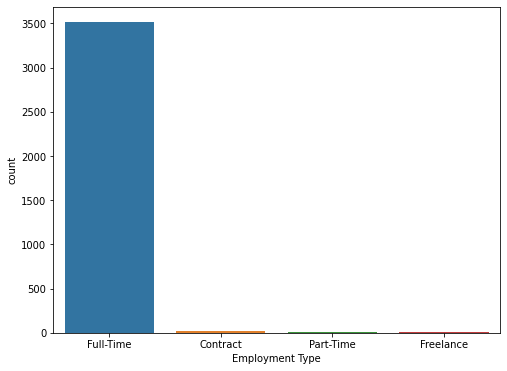

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(data=sal, x='Employment Type')

In [12]:
sal['Employment Type'].value_counts()

Full-Time    3513
Contract       15
Part-Time      13
Freelance      11
Name: Employment Type, dtype: int64

In [13]:
round(100*len(sal[sal['Employment Type']=='Full-Time'])/len(sal),2)

98.9

An overwhelming majority work full-time roles. 98.9% to be precise.

**How skilled and experienced are the data professionals?**

<AxesSubplot:xlabel='Expertise Level', ylabel='count'>

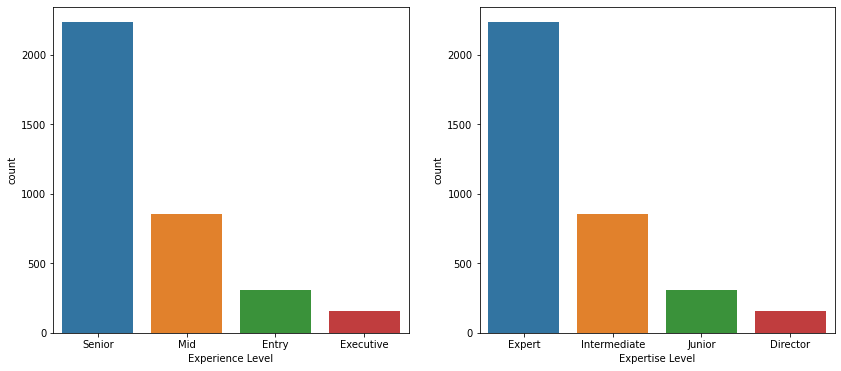

In [14]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.countplot(data=sal, x='Experience Level', ax=axes[0])
sns.countplot(data=sal, x='Expertise Level', ax=axes[1])

A vast majority of our professionals are very advanced in their data careers. They occupy senior positions and consider themselves experts in their respective roles. It is therefore safe to assume that they command astronomical salaries. We will need to be careful when making blanket conclusions about salaries in the data space.

**Where are the companies located?**

<AxesSubplot:>

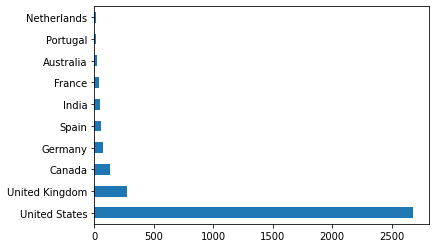

In [15]:
# top 10 countries

sal['Company Location'].value_counts().head(10).plot(kind='barh')

In [16]:
np.round(100*len(sal[sal['Company Location']=='United States'])/len(sal),2)

75.51

About three-quarters (75.51%) of the featured companies are based in the United States.

**Where do the data professionals reside?**

In [17]:
sal['Employee Residence'].value_counts()[:10]

United States     2637
United Kingdom     266
Canada             126
Germany             62
India               59
Spain               55
France              47
Australia           18
Portugal            18
Netherlands         17
Name: Employee Residence, dtype: int64

**Do any of the professionals work remotely?**

In [18]:
remote = sal[sal['Company Location']!=sal['Employee Residence']]

In [19]:
remote.sample(5)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
2873,NLP Engineer,Contract,Mid,Intermediate,60000,United States Dollar,United States,60000,India,Small,2022
2710,Data Analyst,Part-Time,Entry,Junior,125404,United States Dollar,United States,125404,China,Small,2022
2060,Data Analyst,Full-Time,Entry,Junior,50000,United States Dollar,United States,50000,Kuwait,Large,2023
2204,Data Scientist,Full-Time,Entry,Junior,50000,United States Dollar,United States,50000,India,Medium,2023
3351,Applied Data Scientist,Full-Time,Mid,Intermediate,68000,Canadian Dollar,Canada,54238,United Kingdom,Large,2021


In [20]:
len(remote)

107

In [21]:
round(100*len(remote)/len(sal),2)

3.01

Out of the 3552 data professionals in our dataset, 107 work remotely. This represesnts 3.01% of the total.

**Are there any Kenyans or companies based in Kenya?**

In [22]:
sal[(sal['Company Location']=='Kenya') | (sal['Employee Residence']=='Kenya')]

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
171,BI Data Analyst,Full-Time,Entry,Junior,50000,United States Dollar,Kenya,50000,Kenya,Small,2023
2177,Applied Data Scientist,Full-Time,Mid,Intermediate,80000,United States Dollar,Kenya,80000,Kenya,Small,2023


There are two Kenyan residents that work full-time data roles for small Kenya-based companies.

Their salaries look a bit suspicious. As a resident of this country I find it hard to believe that a small Kenyan company can part with 50,000 USD a year for an entry-level analyst. We'll take these figures with a pinch of salt.

**What's the size of these companies?**

In [23]:
sal['Company Size'].value_counts()

Medium    2939
Large      460
Small      153
Name: Company Size, dtype: int64

<AxesSubplot:xlabel='Company Size', ylabel='count'>

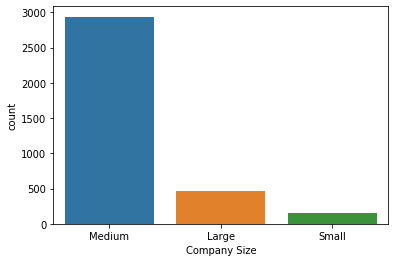

In [24]:
sns.countplot(data=sal,x='Company Size')

In [25]:
100*len(sal[sal['Company Size']!='Medium'])/len(sal)

17.257882882882882

Large and Small copmanies make up just 17.26%, the rest are mid-sized companies.

**Do we have current data?**

<AxesSubplot:>

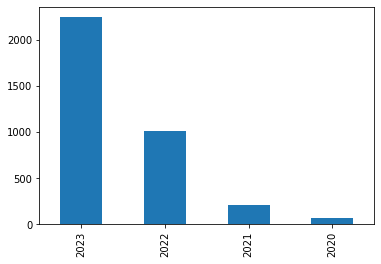

In [26]:
sal['Year'].value_counts().plot(kind='bar')

In [27]:
np.round(100*len(sal[sal['Year']==2023])/len(sal),2)

63.23

We have data from 2020 to 2023. 63.23% of that data is for 2023 alone.

**What is the average salary for a data professional?**

In [28]:
np.mean(sal['Salary in USD'])

142209.30855855855

**What is the median salary?**

In [29]:
np.percentile(sal['Salary in USD'], 50)

136000.0

**How are the salaries distributed?**

<AxesSubplot:xlabel='Salary in USD', ylabel='Count'>

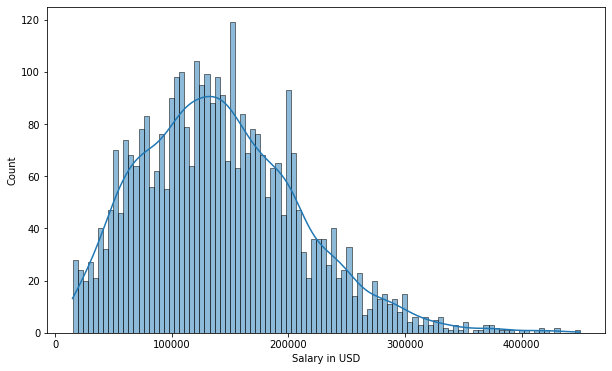

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=sal, x='Salary in USD',bins=100,kde=True)

The salary data appears normally distributed but with a right skew.

To confirm that it is truly normal, we'll do a quantile-quantile plot and check to see whether the empirical rule holds true.

In [31]:
import statsmodels.api as sm

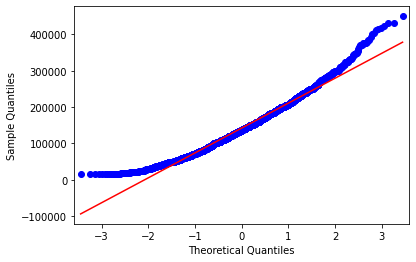

In [32]:
# quantile-quantile plot from statsmodels

fig = sm.qqplot(sal['Salary in USD'], line='s')

The data appears to somehow follow a straight line and can be considered normally distributed.

### Empirical rule

It states that for a given dataset with a normal distribution:
* **68%** of the values lie within 1 standard deviation of the mean
* **95%** of the values lie within 2 standard deviations of the mean
* **99.7%** of the values lie within 3 standard deviations of the mean

In [33]:
sal_mean = sal['Salary in USD'].mean()
sal_std = sal['Salary in USD'].std()

print('Average salary: ', sal_mean)
print('Salary std: ', sal_std)

Average salary:  142209.30855855855
Salary std:  68534.6147896401


`Empirical rule part 1 - 68%`

In [34]:
# what percentage of the salary data falls within 1 standard deviation of the mean?

upper_limit = sal_mean + 1*sal_std
print('upper limit: {}'.format(upper_limit))

lower_limit = sal_mean - 1*sal_std
print('lower limit: {}'.format(lower_limit))

std_1 = ((sal['Salary in USD'] >= lower_limit) & (sal['Salary in USD'] <= upper_limit)).mean()
print('Percentage of data that falls within 1 std of the mean: {}'.format(std_1*100))

upper limit: 210743.92334819864
lower limit: 73674.69376891846
Percentage of data that falls within 1 std of the mean: 68.69369369369369


`Empirical rule part 2 - 95%`

In [35]:
# what percentage of the salary data falls within 12 standard deviations of the mean?

upper_limit = sal_mean + 2*sal_std
print('upper limit: {}'.format(upper_limit))

lower_limit = sal_mean - 2*sal_std
print('lower limit: {}'.format(lower_limit))

std_2 = ((sal['Salary in USD'] >= lower_limit) & (sal['Salary in USD'] <= upper_limit)).mean()
print('Percentage of data that falls within 1 std of the mean: {}'.format(std_2*100))

upper limit: 279278.5381378387
lower limit: 5140.078979278362
Percentage of data that falls within 1 std of the mean: 96.28378378378379


`Empirical rule part 3 - 99.7%`

In [36]:
# what percentage of the salary data falls within 3 standard deviations of the mean?

upper_limit = sal_mean + 3*sal_std
print('upper limit: {}'.format(upper_limit))

lower_limit = sal_mean - 3*sal_std
print('lower limit: {}'.format(lower_limit))

std_3 = ((sal['Salary in USD'] >= lower_limit) & (sal['Salary in USD'] <= upper_limit)).mean()
print('Percentage of data that falls within 1 std of the mean: {}'.format(std_3*100))

upper limit: 347813.15292747883
lower limit: -63394.53581036173
Percentage of data that falls within 1 std of the mean: 99.26801801801803


Our values of `68.69`,`96.28` and `99.26` are very close to those stated in the empirical rule, meaning our salary data is normally distributed.

This determination is important as most statistical tests and machine learning models assume a normal distribution. 

**Distribution of salaries by employment type**

<AxesSubplot:xlabel='Employment Type', ylabel='Salary in USD'>

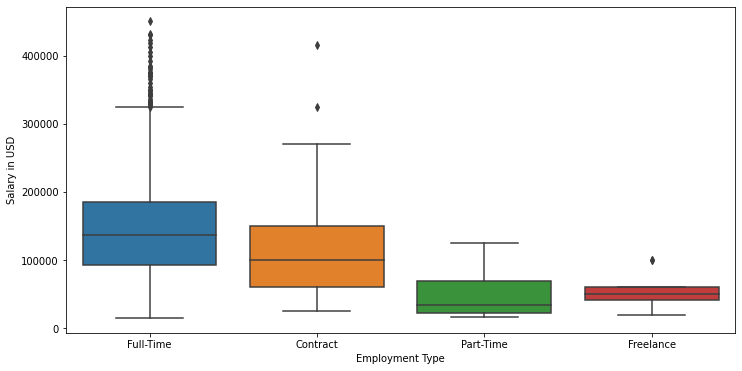

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(data=sal,x='Employment Type',y='Salary in USD')

In [38]:
sal.groupby('Employment Type').median('Salary in USD')['Salary in USD']

Employment Type
Contract     100000
Freelance     50000
Full-Time    136994
Part-Time     34320
Name: Salary in USD, dtype: int64

Full-time roles have the highest median salaries and have the widest salary distribution. They also have a lot of outliers (abnormally large salaries). 

Median salaries trend downwards from full-time, contract, freelance and finally to part-time roles. It is to be expected that those working part-time roles have the lowest median salaries.

A couple of employees on contract terms earn very high salaries.

**Distribution of salaries by level of experience**

<AxesSubplot:xlabel='Experience Level', ylabel='Salary in USD'>

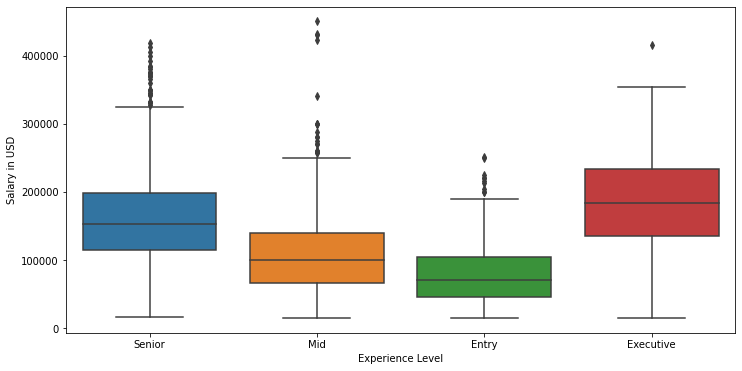

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(data=sal,x='Experience Level',y='Salary in USD')

<AxesSubplot:xlabel='Experience Level'>

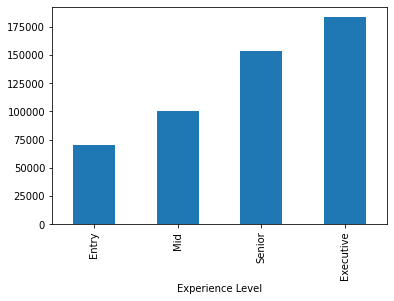

In [40]:
sal.groupby('Experience Level').median('Salary in USD').sort_values('Salary in USD')['Salary in USD'].plot(kind='bar')

It makes sense that median salaries increase with experience. 

We have some mid-level employees with huge salaries.

**Salary distribution by level of expertise**

<AxesSubplot:xlabel='Salary in USD', ylabel='Density'>

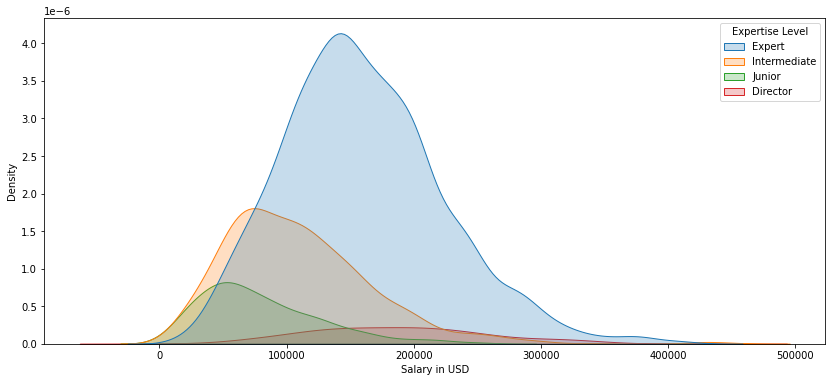

In [41]:
plt.figure(figsize=(14,6))
sns.kdeplot(data=sal,x='Salary in USD',hue='Expertise Level', fill=True)

**How do the salaries look like for companies of different sizes?**

<AxesSubplot:xlabel='Company Size', ylabel='Salary in USD'>

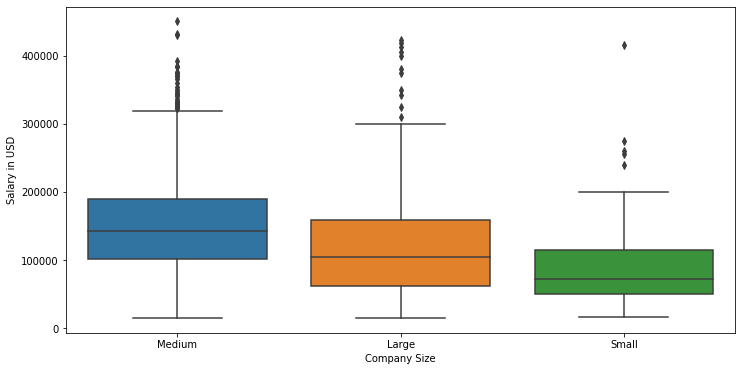

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(data=sal,x='Company Size',y='Salary in USD')

<AxesSubplot:ylabel='Company Size'>

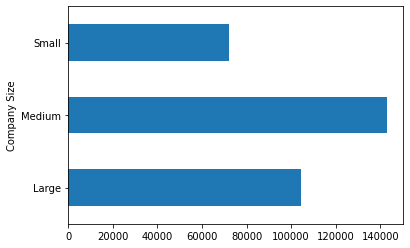

In [43]:
sal.groupby('Company Size').median('Salary in USD')['Salary in USD'].plot(kind='barh')

Interesting to see that medium-sized companies have the highest median salaries.

A few employees at small companies earn very high salaries.

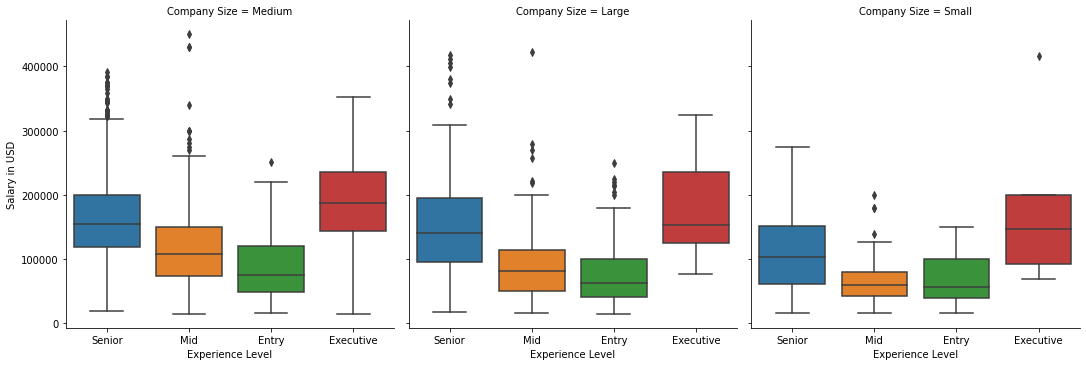

In [44]:
sns.catplot(x='Experience Level',y='Salary in USD',data=sal, col='Company Size', kind='box')

Median salaries increase with expertise regardless of company size.

Entry and mid-level data professionals at small companies have roughly the same median salary. 

Executives at medium-sized companies have a higher median salary compared to their counterparts at large companies. The distribution of salaries at medium companies is however wider.

All company sizes have some mid-level employees with larger than normal salaries.

From the above boxplots, we can see that our salary data has a lot of outliers. As such, `median` is the appropriate metric by which to analyze data science salaries.

**How do the mean salaries for remote and on-site workers compare?**

Remember we created a `remote` dataframe isolating the professionals who work for companies not located in their country of residence.

In [45]:
# 20 random samples
# we will be sampling with replacement
# random state is just an arbitrary number

remote_sample = remote.sample(n=20, replace=True, random_state=90210)

In [46]:
remote_sample['Salary in USD'].mean()

89223.7

In [47]:
on_site = sal[sal['Company Location']==sal['Employee Residence']]

In [48]:
on_site_sample = on_site.sample(n=20, replace=True, random_state=72950)

In [49]:
on_site_sample['Salary in USD'].mean()

134397.1

From the random samples, the mean salary for those who work remotely is `89223.7 USD`, while the mean salary for those who work and live in the same country is `134397.1 USD`. The difference is actually `45173.4 USD`.

Is this difference statistically significant?

**Is the difference between the means statistically significant?**

The industry standard for comparing two means in the `two-sample t-test` typically used for `A/B testing`.

**Two-sample t-test assumptions:**
* the two samples are independent of each other
* for each sample, the data is drawn randomly from a normally distributed population
* the population standard deviation is unknown.

It is safe to assume independence in this case. Most datasets are normally distributed and we proved that earlier. The population std is unknown as it is impossible to get salary data for every single data professional. 

We need to conduct a `hypothesis test` which is a statistical procedure that uses sample data to evaluate an assumption about a population parameter.

`Step 1`: State the null hypothesis ($H_0$) and alternative hypothesis ($H_A$)


$H_0$: there is no difference between the means

$H_A$: there is a difference between the means

`Step 2`: Choose a significance level which is defined as either the probability of rejecting a null hypothesis when it is true or the threshold at which a result is considered statistically significant.

In [50]:
significance_level = 0.05

`Step 3`: Find the p_value (the probability of observing results as or more extreme than the ones observed when the null hypothesis is true).

In [51]:
# to find the p value we import t_test from scipy's stats module

from scipy import stats

In [52]:
# set equal variance to FALSE
# we don't have data for the entire population so can't assume anything about the variance

stats.ttest_ind(a=remote_sample['Salary in USD'] , b=on_site_sample['Salary in USD'] , equal_var=False)

Ttest_indResult(statistic=-2.0733468155588386, pvalue=0.04502581320963704)

`Step 4`: Reject or fail to reject the null hypothesis.

If p_value < significance level: reject the $H_0$

If p_value > significance level: fail to reject the $H_0$

Our `pvalue` of `0.04502581320963704` is less than our `significance level` of `0.05`. We therefore reject the null hypothesis that the means are equal and conclude that there is a statistically significant difference between the mean salaries of remote and on-site data professionals. The difference is not due to random chance or sampling variability.